<a href="https://colab.research.google.com/github/greyga/TFM-GRG/blob/main/TRATAMIENTO_DATOS_genes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
library(dplyr)

# Cargar el archivo CSV
data <- read.csv("/content/DATOS COMPARACION - EXOMISER+PHENOTYPIC20.csv", sep = ",", header = TRUE)

# Crear una lista vacía para almacenar los resultados
resultados <- list()

# Obtener la lista de variantes
variantes <- c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7")

# Recorrer cada variante y extraer el ranking y Phenotypic Score correspondientes
for (variante in variantes) {
  subset_data <- subset(data, Ab_immune_system == variante)

  # Obtener el ranking y Phenotypic Score de la variante
  ranking <- subset_data$Ranking[!is.na(subset_data$Ranking)]
  ps_estrategia <- subset_data$PS_AIGS[!is.na(subset_data$PS_AIGS)]

  # Verificar si hay valores válidos para la variante y estrategia
  if (length(ranking) > 0 && length(ps_estrategia) > 0) {
    # Crear un dataframe con los datos de ranking y Phenotypic Score
    df <- data.frame(Variante = variante, Ranking = ranking, Phenotypic_Score = ps_estrategia)

    # Agregar el dataframe a la lista de resultados
    resultados[[variante]] <- df
  }
}

# Combinar los dataframes en una única tabla
tabla_resultados <- bind_rows(resultados)

# Imprimir la tabla de resultados
print(tabla_resultados)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




  Variante Ranking Phenotypic_Score
1   PTGER2       3                0
2    TBX21      11                0
3     HNMT      10                0
4    ADRB2       4                0
5   PLA2G7      21                0


In [ ]:
# Obtener la lista de variantes
variantes <- c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7")
# Recorrer cada variante y extraer el ranking y Phenotypic Score correspondientes
for (variante in variantes) {
  subset_data <- subset(data, Ab_immune_system == variante)

  # Obtener el ranking y Phenotypic Score de la variante
  ranking <- subset_data$Ranking[!is.na(subset_data$Ranking)]
  ps_estrategia <- subset_data$PS_AIGS[!is.na(subset_data$PS_AIGS)]

  # Verificar si hay valores válidos para la variante y estrategia
  if (length(ranking) > 0 && length(ps_estrategia) > 0) {
    # Crear un dataframe con los datos de ranking y Phenotypic Score
    df <- data.frame(Variante = variante, Ranking = ranking, Phenotypic_Score = ps_estrategia)

    # Agregar el dataframe a la lista de resultados
    resultados[[variante]] <- df
  }
}

# Combinar los dataframes en una única tabla
tabla_resultados <- bind_rows(resultados)

# Imprimir la tabla de resultados
print(tabla_resultados)

  Variante Ranking Phenotypic_Score
1   PTGER2       3                0
2    TBX21      11                0
3     HNMT      10                0
4    ADRB2       4                0
5   PLA2G7      21                0


In [ ]:
library(dplyr)

# Cargar el archivo CSV
data <- read.csv("/content/DATOS COMPARACION - EXOMISER+PHENOTYPIC20.csv", sep = ",", header = TRUE)

# Crear una lista vacía para almacenar los resultados
resultados <- list()

# Definir las estrategias y sus respectivas columnas de Phenotypic Score
estrategias <- c("Sin_HPO", "Asthma", "Asthma_ARS", "Asthma_ARP", "Ab_Resp_system", "Asthma_Ig_hypers", "Asthma_Abnormality_Igsystem", "Ab_immune_system", "Decreased_T4", "Decreased_T4_Abnormal_circulating_T4_concentration", "Increased_T4", "HPO increased T4_Abnormal_T4", "Ab_endocrine_system", "all_HPOS", "Abnormality_of_face")

columnas_ps <- c("PS_Sin_HPO", "PS_Asthma", "PS_A_Ab_Resp", "PS_A_y_ARP", "PS_ARS", "PS_A_y_Ighypers", "PS_A_AIGS", "PS_AIGS",
                 "PS_Decreased_T4", "PS_dT4_ACT4", "PS_iT4", "PS_dT4_ACT4", "PS_AES", "PS_allHPO")

# Recorrer cada estrategia
for (i in seq_along(estrategias)) {
  estrategia <- estrategias[i]
  columna_ps <- columnas_ps[i]

  # Recorrer cada variante y extraer el ranking y Phenotypic Score correspondientes
  for (variante in variantes) {
    subset_data <- subset(data, data[[estrategia]] == variante)

    # Obtener el ranking y Phenotypic Score de la variante y estrategia
    ranking <- subset_data$Ranking[!is.na(subset_data$Ranking)]
    ps_estrategia <- subset_data[[columna_ps]][!is.na(subset_data[[columna_ps]])]

    # Verificar si hay valores válidos para la variante y estrategia
    if (length(ranking) > 0 && length(ps_estrategia) > 0) {
      # Convertir la columna de Phenotypic Score a tipo "character"
      ps_estrategia <- as.character(ps_estrategia)

      # Crear un dataframe con los datos de ranking y Phenotypic Score
      df <- data.frame(Variante = variante, Estrategia = estrategia, Ranking = ranking, Phenotypic_Score = ps_estrategia)

      # Agregar el dataframe a la lista de resultados
      resultados[[paste(variante, estrategia, sep = "_")]] <- df
    }
  }
}

# Combinar los dataframes en una única tabla
tabla_resultados <- bind_rows(resultados)

# Imprimir la tabla de resultados
print(tabla_resultados)


   Variante                  Estrategia Ranking Phenotypic_Score
1    PTGER2                     Sin_HPO       3                0
2     TBX21                     Sin_HPO      11                0
3      HNMT                     Sin_HPO      10                0
4     ADRB2                     Sin_HPO       4                0
5    PLA2G7                     Sin_HPO      21              0,5
6    PTGER2                      Asthma       1             0,92
7     TBX21                      Asthma       2             0,92
8      HNMT                      Asthma       8              0,5
9     ADRB2                      Asthma      18                0
10   PLA2G7                      Asthma      21              0,5
11   PTGER2                  Asthma_ARS       1                1
12    TBX21                  Asthma_ARS       2                1
13     HNMT                  Asthma_ARS       8            0,501
14    ADRB2                  Asthma_ARS      18                0
15   PLA2G7              

In [ ]:
# Verificar el tipo de variables en tabla_resultados
str(tabla_resultados)


'data.frame':	60 obs. of  4 variables:
 $ Variante        : chr  "PTGER2" "TBX21" "HNMT" "ADRB2" ...
 $ Estrategia      : chr  "Sin_HPO" "Sin_HPO" "Sin_HPO" "Sin_HPO" ...
 $ Ranking         : chr  "3" "11" "10" "4" ...
 $ Phenotypic_Score: chr  "0" "0" "0" "0" ...


In [ ]:
tabla_resultados$Ranking <- as.numeric(gsub(",", ".", tabla_resultados$Ranking))
tabla_resultados$Phenotypic_Score <- as.numeric(gsub(",", ".", tabla_resultados$Phenotypic_Score))



In [ ]:
# Crear el DataFrame "datos_Asthma"
datos_Asthma <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(1, 2, 8, 18, 21),
  Phenotypic_Score = c(0.92, 0.92, 0.50, 0.00, 0.50),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Asthma"
print(datos_Asthma)


  Variante Ranking Phenotypic_Score
1   PTGER2       1             0.92
2    TBX21       2             0.92
3     HNMT       8             0.50
4    ADRB2      18             0.00
5   PLA2G7      21             0.50


In [ ]:
str(datos_Asthma)

'data.frame':	5 obs. of  4 variables:
 $ Variante        : chr  "PTGER2" "TBX21" "HNMT" "ADRB2" ...
 $ Ranking         : num  1 2 8 18 21
 $ Phenotypic_Score: num  0.92 0.92 0.5 0 0.5
 $ Top10           : num  1 1 1 0 0


In [ ]:
# Crear el DataFrame "datos_Sin_HPO"
datos_Sin_HPO <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(3, 4, 10, 11, 21),
  Phenotypic_Score = c (0.0, 0.0 ,0.0 , 0.0 ,0.0),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Sin_HPO"
print(datos_Sin_HPO)


  Variante Ranking Phenotypic_Score
1   PTGER2       3                0
2    TBX21       4                0
3     HNMT      10                0
4    ADRB2      11                0
5   PLA2G7      21                0


In [ ]:
# Crear el DataFrame "datos_Asthma_ARS"
datos_Asthma_ARS <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(1, 2, 8, 18, 21),
  Phenotypic_Score = c(1, 1, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Asthma_ARS"
print(datos_Asthma_ARS)


  Variante Ranking Phenotypic_Score
1   PTGER2       1              1.0
2    TBX21       2              1.0
3     HNMT       8              0.5
4    ADRB2      18              0.0
5   PLA2G7      21              0.5


In [ ]:
# Crear el DataFrame "datos_Asthma_ARP"
datos_Asthma_ARP <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(1, 2, 8, 18, 21),
  Phenotypic_Score = c(1, 1, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Asthma_ARP"
print(datos_Asthma_ARP)


  Variante Ranking Phenotypic_Score
1   PTGER2       1              1.0
2    TBX21       2              1.0
3     HNMT       8              0.5
4    ADRB2      18              0.0
5   PLA2G7      21              0.5


In [ ]:
# Crear el DataFrame "datos_Ab_Resp_system"
datos_Ab_Resp_system <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(1, 2, 8, 16, 21),
  Phenotypic_Score = c(1, 1, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Ab_Resp_system"
print(datos_Ab_Resp_system)


  Variante Ranking Phenotypic_Score
1   PTGER2       1              1.0
2    TBX21       2              1.0
3     HNMT       8              0.5
4    ADRB2      16              0.0
5   PLA2G7      21              0.5


In [ ]:
# Crear el DataFrame "datos_Asthma_Ig_hypers"
datos_Asthma_Ig_hypers <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(1, 2, 8, 16, 21),
  Phenotypic_Score = c(0.93, 0.93, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Asthma_Ig_hypers"
print(datos_Asthma_Ig_hypers)


  Variante Ranking Phenotypic_Score
1   PTGER2       1             0.93
2    TBX21       2             0.93
3     HNMT       8             0.50
4    ADRB2      16             0.00
5   PLA2G7      21             0.50


In [ ]:
# Crear el DataFrame "datos_Asthma_Abnormality_Igsystem"
datos_Asthma_Abnormality_Igsystem <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(1, 2, 8, 16, 21),
  Phenotypic_Score = c(1, 1, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Asthma_Abnormality_Igsystem"
print(datos_Asthma_Abnormality_Igsystem)


  Variante Ranking Phenotypic_Score
1   PTGER2       1              1.0
2    TBX21       2              1.0
3     HNMT       8              0.5
4    ADRB2      16              0.0
5   PLA2G7      21              0.5


In [ ]:
# Crear el DataFrame "datos_Ab_endocrine_system"
datos_Ab_endocrine_system <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(3, 8, 9, 17, 21),
  Phenotypic_Score = c(0.5, 0.5, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "Ab_endocrine_system"
print(datos_Ab_endocrine_system)


  Variante Ranking Phenotypic_Score
1   PTGER2       3              0.5
2    TBX21       8              0.5
3     HNMT       9              0.5
4    ADRB2      17              0.0
5   PLA2G7      21              0.5


In [ ]:
# Crear el DataFrame "datos_all_HPOS"
datos_all_HPOS <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(4, 5, 10, 17, 21),
  Phenotypic_Score = c(0.67, 0.97, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "all_HPOS"
print(datos_all_HPOS)


  Variante Ranking Phenotypic_Score
1   PTGER2       4             0.67
2    TBX21       5             0.97
3     HNMT      10             0.50
4    ADRB2      17             0.00
5   PLA2G7      21             0.50


In [ ]:
# Crear el DataFrame "datos_Decreased_T4"
datos_Decreased_T4 <- data.frame(
  Variante = c("PTGER2", "TBX21", "HNMT", "ADRB2", "PLA2G7"),
  Ranking = c(5, 10, 9, 17, 21),
  Phenotypic_Score = c(0.5, 0.5, 0.5, 0.0, 0.5),
  stringsAsFactors = FALSE
)

# Imprimir el DataFrame "datos_Decreased_T4"
print(datos_Decreased_T4)


  Variante Ranking Phenotypic_Score
1   PTGER2       5              0.5
2    TBX21      10              0.5
3     HNMT       9              0.5
4    ADRB2      17              0.0
5   PLA2G7      21              0.5


COMPARACIONES ESTADISTICAS

In [ ]:
# Comparación de Rankings utilizando la prueba de Mann-Whitney
mw_ranking_results <- list()
dataframes <- list(datos_Sin_HPO, datos_Asthma, datos_Asthma_ARS, datos_Asthma_ARP, datos_Ab_Resp_system, datos_Asthma_Ig_hypers, datos_Asthma_Abnormality_Igsystem, datos_Ab_endocrine_system, datos_all_HPOS, datos_Decreased_T4)

# Asignar nombres a los dataframes
names(dataframes) <- c("datos_Sin_HPO", "datos_Asthma", "datos_Asthma_ARS", "datos_Asthma_ARP", "datos_Ab_Resp_system", "datos_Asthma_Ig_hypers", "datos_Asthma_Abnormality_Igsystem", "datos_Ab_endocrine_system", "datos_all_HPOS", "datos_Decreased_T4")

cat("Comparación de Rankings utilizando la prueba de Mann-Whitney:\n")
counter <- 1

for (i in 1:(length(dataframes) - 1)) {
  for (j in (i+1):length(dataframes)) {
    df1 <- dataframes[[i]]
    df2 <- dataframes[[j]]
    comparison <- try(wilcox.test(df1$Ranking, df2$Ranking, exact = FALSE), silent = TRUE)
    if (inherits(comparison, "try-error")) {
      cat(counter, ". No se pudo calcular el valor p para la comparación:", names(dataframes)[i], "con", names(dataframes)[j], "para el ranking usando Mann-Whitney.\n")
    } else {
      p_value <- comparison$p.value
      comparison_name <- paste(names(dataframes)[i], "con", names(dataframes)[j])
      mw_ranking_results[[comparison_name]] <- p_value
      cat(counter, ". El valor p de la comparación", names(dataframes)[i], "con", names(dataframes)[j], "para el ranking usando Mann-Whitney es:", p_value, "\n")
    }
    counter <- counter + 1
  }
}

# Comparación de Phenotypic Scores utilizando la prueba de Mann-Whitney
mw_score_results <- list()

cat("\nComparación de Phenotypic Scores utilizando la prueba de Mann-Whitney:\n")
counter <- 1

for (i in 1:(length(dataframes) - 1)) {
  for (j in (i+1):length(dataframes)) {
    df1 <- dataframes[[i]]
    df2 <- dataframes[[j]]
    comparison <- try(wilcox.test(df1$Phenotypic_Score, df2$Phenotypic_Score, exact = FALSE), silent = TRUE)
    if (inherits(comparison, "try-error")) {
      cat(counter, ". No se pudo calcular el valor p para la comparación:", names(dataframes)[i], "con", names(dataframes)[j], "para el Phenotypic_score usando Mann-Whitney.\n")
    } else {
      p_value <- comparison$p.value
      comparison_name <- paste(names(dataframes)[i], "con", names(dataframes)[j])
      mw_score_results[[comparison_name]] <- p_value
      cat(counter, ". El valor p de la comparación", names(dataframes)[i], "con", names(dataframes)[j], "para el Phenotypic_score usando Mann-Whitney es:", p_value, "\n")
    }
    counter <- counter + 1
  }
}

# Comparación de Rankings utilizando el test de Chi-cuadrado
chi2_ranking_results <- list()

cat("\nComparación de Rankings utilizando el test de Chi-cuadrado:\n")
counter <- 1

for (i in 1:(length(dataframes) - 1)) {
  for (j in (i+1):length(dataframes)) {
    df1 <- dataframes[[i]]
    df2 <- dataframes[[j]]
    contingency_table <- table(df1$Ranking, df2$Ranking)
    comparison <- try(chisq.test(contingency_table), silent = TRUE)
    if (inherits(comparison, "try-error")) {
      cat(counter, ". No se pudo calcular el valor p para la comparación:", names(dataframes)[i], "con", names(dataframes)[j], "para el ranking usando Chi2.\n")
    } else {
      p_value <- comparison$p.value
      comparison_name <- paste(names(dataframes)[i], "con", names(dataframes)[j])
      chi2_ranking_results[[comparison_name]] <- p_value
      cat(counter, ". El valor p de la comparación", names(dataframes)[i], "con", names(dataframes)[j], "para el ranking usando Chi2 es:", p_value, "\n")
    }
    counter <- counter + 1
  }
}

# Comparación de Phenotypic Scores utilizando el test de Chi-cuadrado
chi2_score_results <- list()

cat("\nComparación de Phenotypic Scores utilizando el test de Chi-cuadrado:\n")
counter <- 1

for (i in 1:(length(dataframes) - 1)) {
  for (j in (i+1):length(dataframes)) {
    df1 <- dataframes[[i]]
    df2 <- dataframes[[j]]
    contingency_table <- table(df1$Phenotypic_Score, df2$Phenotypic_Score)
    comparison <- try(chisq.test(contingency_table), silent = TRUE)
    if (inherits(comparison, "try-error")) {
      cat(counter, ". No se pudo calcular el valor p para la comparación:", names(dataframes)[i], "con", names(dataframes)[j], "para el Phenotypic_score usando Chi2.\n")
    } else {
      p_value <- comparison$p.value
      comparison_name <- paste(names(dataframes)[i], "con", names(dataframes)[j])
      chi2_score_results[[comparison_name]] <- p_value
      cat(counter, ". El valor p de la comparación", names(dataframes)[i], "con", names(dataframes)[j], "para el Phenotypic_score usando Chi2 es:", p_value, "\n")
    }
    counter <- counter + 1
  }
}


Comparación de Rankings utilizando la prueba de Mann-Whitney:
1 . El valor p de la comparación datos_Sin_HPO con datos_Asthma para el ranking usando Mann-Whitney es: 0.753298 
2 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_ARS para el ranking usando Mann-Whitney es: 0.753298 
3 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_ARP para el ranking usando Mann-Whitney es: 0.753298 
4 . El valor p de la comparación datos_Sin_HPO con datos_Ab_Resp_system para el ranking usando Mann-Whitney es: 0.753298 
5 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_Ig_hypers para el ranking usando Mann-Whitney es: 0.753298 
6 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_Abnormality_Igsystem para el ranking usando Mann-Whitney es: 0.753298 
7 . El valor p de la comparación datos_Sin_HPO con datos_Ab_endocrine_system para el ranking usando Mann-Whitney es: 1 
8 . El valor p de la comparación datos_Sin_HPO con datos_all_HPOS para el ranking usand

Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


1 . El valor p de la comparación datos_Sin_HPO con datos_Asthma para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


2 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_ARS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


3 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_ARP para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


4 . El valor p de la comparación datos_Sin_HPO con datos_Ab_Resp_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


5 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_Ig_hypers para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


6 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_Abnormality_Igsystem para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


7 . El valor p de la comparación datos_Sin_HPO con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


8 . El valor p de la comparación datos_Sin_HPO con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


9 . El valor p de la comparación datos_Sin_HPO con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


10 . El valor p de la comparación datos_Asthma con datos_Asthma_ARS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


11 . El valor p de la comparación datos_Asthma con datos_Asthma_ARP para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


12 . El valor p de la comparación datos_Asthma con datos_Ab_Resp_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


13 . El valor p de la comparación datos_Asthma con datos_Asthma_Ig_hypers para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


14 . El valor p de la comparación datos_Asthma con datos_Asthma_Abnormality_Igsystem para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


15 . El valor p de la comparación datos_Asthma con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


16 . El valor p de la comparación datos_Asthma con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


17 . El valor p de la comparación datos_Asthma con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


18 . El valor p de la comparación datos_Asthma_ARS con datos_Asthma_ARP para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


19 . El valor p de la comparación datos_Asthma_ARS con datos_Ab_Resp_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


20 . El valor p de la comparación datos_Asthma_ARS con datos_Asthma_Ig_hypers para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


21 . El valor p de la comparación datos_Asthma_ARS con datos_Asthma_Abnormality_Igsystem para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


22 . El valor p de la comparación datos_Asthma_ARS con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


23 . El valor p de la comparación datos_Asthma_ARS con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


24 . El valor p de la comparación datos_Asthma_ARS con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


25 . El valor p de la comparación datos_Asthma_ARP con datos_Ab_Resp_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


26 . El valor p de la comparación datos_Asthma_ARP con datos_Asthma_Ig_hypers para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


27 . El valor p de la comparación datos_Asthma_ARP con datos_Asthma_Abnormality_Igsystem para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


28 . El valor p de la comparación datos_Asthma_ARP con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


29 . El valor p de la comparación datos_Asthma_ARP con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


30 . El valor p de la comparación datos_Asthma_ARP con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


31 . El valor p de la comparación datos_Ab_Resp_system con datos_Asthma_Ig_hypers para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


32 . El valor p de la comparación datos_Ab_Resp_system con datos_Asthma_Abnormality_Igsystem para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


33 . El valor p de la comparación datos_Ab_Resp_system con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


34 . El valor p de la comparación datos_Ab_Resp_system con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


35 . El valor p de la comparación datos_Ab_Resp_system con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


36 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_Asthma_Abnormality_Igsystem para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


37 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


38 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


39 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


40 . El valor p de la comparación datos_Asthma_Abnormality_Igsystem con datos_Ab_endocrine_system para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


41 . El valor p de la comparación datos_Asthma_Abnormality_Igsystem con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


42 . El valor p de la comparación datos_Asthma_Abnormality_Igsystem con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


43 . El valor p de la comparación datos_Ab_endocrine_system con datos_all_HPOS para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


44 . El valor p de la comparación datos_Ab_endocrine_system con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


45 . El valor p de la comparación datos_all_HPOS con datos_Decreased_T4 para el ranking usando Chi2 es: 0.2202206 

Comparación de Phenotypic Scores utilizando el test de Chi-cuadrado:


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


1 . El valor p de la comparación datos_Sin_HPO con datos_Asthma para el Phenotypic_score usando Chi2 es: 0.8187308 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


2 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_ARS para el Phenotypic_score usando Chi2 es: 0.8187308 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


3 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_ARP para el Phenotypic_score usando Chi2 es: 0.8187308 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


4 . El valor p de la comparación datos_Sin_HPO con datos_Ab_Resp_system para el Phenotypic_score usando Chi2 es: 0.8187308 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


5 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_Ig_hypers para el Phenotypic_score usando Chi2 es: 0.8187308 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


6 . El valor p de la comparación datos_Sin_HPO con datos_Asthma_Abnormality_Igsystem para el Phenotypic_score usando Chi2 es: 0.8187308 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


7 . El valor p de la comparación datos_Sin_HPO con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.1797125 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


8 . El valor p de la comparación datos_Sin_HPO con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.8964324 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


9 . El valor p de la comparación datos_Sin_HPO con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.1797125 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


10 . El valor p de la comparación datos_Asthma con datos_Asthma_ARS para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


11 . El valor p de la comparación datos_Asthma con datos_Asthma_ARP para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


12 . El valor p de la comparación datos_Asthma con datos_Ab_Resp_system para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


13 . El valor p de la comparación datos_Asthma con datos_Asthma_Ig_hypers para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


14 . El valor p de la comparación datos_Asthma con datos_Asthma_Abnormality_Igsystem para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


15 . El valor p de la comparación datos_Asthma con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


16 . El valor p de la comparación datos_Asthma con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.124652 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


17 . El valor p de la comparación datos_Asthma con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


18 . El valor p de la comparación datos_Asthma_ARS con datos_Asthma_ARP para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


19 . El valor p de la comparación datos_Asthma_ARS con datos_Ab_Resp_system para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


20 . El valor p de la comparación datos_Asthma_ARS con datos_Asthma_Ig_hypers para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


21 . El valor p de la comparación datos_Asthma_ARS con datos_Asthma_Abnormality_Igsystem para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


22 . El valor p de la comparación datos_Asthma_ARS con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


23 . El valor p de la comparación datos_Asthma_ARS con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.124652 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


24 . El valor p de la comparación datos_Asthma_ARS con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


25 . El valor p de la comparación datos_Asthma_ARP con datos_Ab_Resp_system para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


26 . El valor p de la comparación datos_Asthma_ARP con datos_Asthma_Ig_hypers para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


27 . El valor p de la comparación datos_Asthma_ARP con datos_Asthma_Abnormality_Igsystem para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


28 . El valor p de la comparación datos_Asthma_ARP con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


29 . El valor p de la comparación datos_Asthma_ARP con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.124652 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


30 . El valor p de la comparación datos_Asthma_ARP con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


31 . El valor p de la comparación datos_Ab_Resp_system con datos_Asthma_Ig_hypers para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


32 . El valor p de la comparación datos_Ab_Resp_system con datos_Asthma_Abnormality_Igsystem para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


33 . El valor p de la comparación datos_Ab_Resp_system con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


34 . El valor p de la comparación datos_Ab_Resp_system con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.124652 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


35 . El valor p de la comparación datos_Ab_Resp_system con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


36 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_Asthma_Abnormality_Igsystem para el Phenotypic_score usando Chi2 es: 0.04042768 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


37 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


38 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.124652 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


39 . El valor p de la comparación datos_Asthma_Ig_hypers con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


40 . El valor p de la comparación datos_Asthma_Abnormality_Igsystem con datos_Ab_endocrine_system para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


41 . El valor p de la comparación datos_Asthma_Abnormality_Igsystem con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.124652 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


42 . El valor p de la comparación datos_Asthma_Abnormality_Igsystem con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.082085 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


43 . El valor p de la comparación datos_Ab_endocrine_system con datos_all_HPOS para el Phenotypic_score usando Chi2 es: 0.1717971 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


44 . El valor p de la comparación datos_Ab_endocrine_system con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.4017356 


Warning message in chisq.test(contingency_table):
“Chi-squared approximation may be incorrect”


45 . El valor p de la comparación datos_all_HPOS con datos_Decreased_T4 para el Phenotypic_score usando Chi2 es: 0.1717971 


In [ ]:
# Filtrar valores p menores a 0.05 para la comparación de Rankings utilizando Mann-Whitney
significant_ranking_results <- Filter(function(x) x < 0.05, unlist(mw_ranking_results))
cat("\nComparaciones de Rankings con diferencias estadísticamente significativas (Mann-Whitney):\n")
cat(paste(names(significant_ranking_results), "(", significant_ranking_results, ")", sep = " "), "\n")

# Filtrar valores p menores a 0.05 para la comparación de Phenotypic Scores utilizando Mann-Whitney
significant_score_results <- Filter(function(x) x < 0.05, unlist(mw_score_results))
cat("\nComparaciones de Phenotypic Scores con diferencias estadísticamente significativas (Mann-Whitney):\n")
cat(paste(names(significant_score_results), "(", significant_score_results, ")", sep = " "), "\n")

# Filtrar valores p menores a 0.05 para la comparación de Rankings utilizando Chi-cuadrado
significant_chi2_ranking_results <- Filter(function(x) x < 0.05, unlist(chi2_ranking_results))
cat("\nComparaciones de Rankings con diferencias estadísticamente significativas (Chi-cuadrado):\n")
cat(paste(names(significant_chi2_ranking_results), "(", significant_chi2_ranking_results, ")", sep = " "), "\n")

# Filtrar valores p menores a 0.05 para la comparación de Phenotypic Scores utilizando Chi-cuadrado
significant_chi2_score_results <- Filter(function(x) x < 0.05, unlist(chi2_score_results))
cat("\nComparaciones de Phenotypic Scores con diferencias estadísticamente significativas (Chi-cuadrado):\n")
cat(paste(names(significant_chi2_score_results), "(", significant_chi2_score_results, ")", sep = " "), "\n")



Comparaciones de Rankings con diferencias estadísticamente significativas (Mann-Whitney):
 (  ) 

Comparaciones de Phenotypic Scores con diferencias estadísticamente significativas (Mann-Whitney):
datos_Sin_HPO con datos_Asthma ( 0.0242514051837674 ) datos_Sin_HPO con datos_Asthma_ARS ( 0.0242514051837674 ) datos_Sin_HPO con datos_Asthma_ARP ( 0.0242514051837674 ) datos_Sin_HPO con datos_Ab_Resp_system ( 0.0242514051837674 ) datos_Sin_HPO con datos_Asthma_Ig_hypers ( 0.0242514051837674 ) datos_Sin_HPO con datos_Asthma_Abnormality_Igsystem ( 0.0242514051837674 ) datos_Sin_HPO con datos_Ab_endocrine_system ( 0.0199644533052161 ) datos_Sin_HPO con datos_all_HPOS ( 0.0248084245478095 ) datos_Sin_HPO con datos_Decreased_T4 ( 0.0199644533052161 ) 

Comparaciones de Rankings con diferencias estadísticamente significativas (Chi-cuadrado):
 (  ) 

Comparaciones de Phenotypic Scores con diferencias estadísticamente significativas (Chi-cuadrado):
datos_Asthma con datos_Asthma_ARS ( 0.04042768199



CURVAS **ROC**



1. Sin_HPO

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 5 primeras o no
datos_Sin_HPO$Top10 <- ifelse(datos_Sin_HPO$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "Asthma"
modelo_Sin_HPO <- glm(Top5 ~ Phenotypic_Score, data = datos_Sin_HPO, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 5 primeras para la estrategia "Asthma"
nuevos_datos_Sin_HPO <- data.frame(Phenotypic_Score = c(0.6, 0.5, 0.95))
probabilidades_Sin_HPO <- predict(modelo_Sin_HPO, newdata = nuevos_datos_Sin_HPO, type = "response")

# Imprimir las probabilidades predichas para la estrategia "Asthma"
cat("Probabilidades para la estrategia 'Sin_HPO':\n")
print(probabilidades_Sin_HPO)


Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
“prediction from rank-deficient fit; attr(*, "non-estim") has doubtful cases”


Probabilidades para la estrategia 'Sin_HPO':
  1   2   3 
0.4 0.4 0.4 
attr(,"non-estim")
1 2 3 
1 2 3 


In [ ]:
# Obtener las predicciones del modelo para los datos originales
predicciones_Sin_HPO <- predict(modelo_Sin_HPO, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.6)
predicciones_binarias_Sin_HPO<- ifelse(predicciones_Sin_HPO > 0.5, 1, 0)

# Crear una matriz de confusión
matriz_confusion_Sin_HPO <- table(datos_Sin_HPO$Top10, predicciones_binarias_Sin_HPO)
print(matriz_confusion_Sin_HPO)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_Sin_HPO)) / sum(matriz_confusion_Sin_HPO)
precision <- matriz_confusion_Sin_HPO[1, 1] / sum(predicciones_binarias_Sin_HPO)
recall <- matriz_confusion_Sin_HPO[2, 1] / sum(datos_Sin_HPO$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

   predicciones_binarias_Sin_HPO
    0
  0 2
  1 3
Accuracy: 0.4 
Precision: Inf 
Recall: 1 
F1 Score: NaN 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.5 


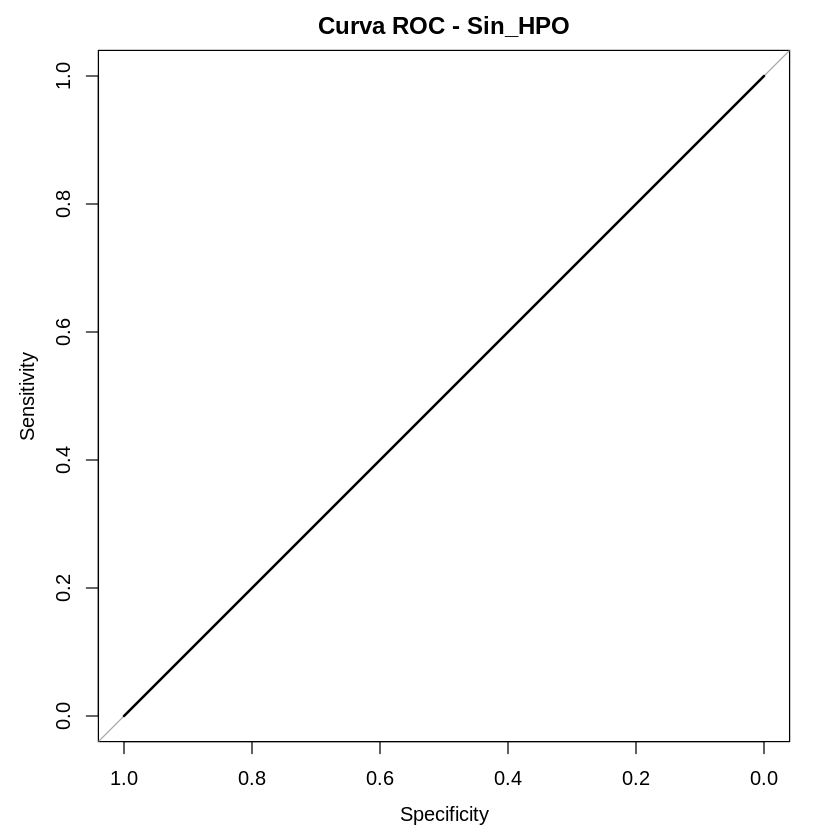

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_Sin_HPO <- datos_Sin_HPO$Top10

# Calcular la curva ROC
roc_Sin_HPO<- roc(respuestas_verdaderas_Sin_HPO, predicciones_Sin_HPO)

# Plotear la curva ROC
plot(roc_Sin_HPO, main = "Curva ROC - Sin_HPO")
# Calcular el área bajo la curva (AUC)
auc_Sin_HPO <- auc(respuestas_verdaderas_Sin_HPO, predicciones_Sin_HPO)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_Sin_HPO, "\n")

2. HPO: Asthma HP:0002099

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 10 primeras o no
datos_Asthma$Top10 <- ifelse(datos_Asthma$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "Asthma"
modelo_Asthma <- glm(Top10 ~ Phenotypic_Score, data = datos_Asthma, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 10 primeras para la estrategia "Asthma"
nuevos_datos_Asthma <- data.frame(Phenotypic_Score = c(0.6, 0.5, 0.95))
probabilidades_Asthma <- predict(modelo_Asthma, newdata = nuevos_datos_Asthma, type = "response")

# Imprimir las probabilidades predichas para la estrategia "Asthma"
cat("Probabilidades para la estrategia 'Asthma':\n")
print(probabilidades_Asthma)



Probabilidades para la estrategia 'Asthma':
        1         2         3 
0.9916648 0.5000000 1.0000000 


In [ ]:
# Obtener las predicciones del modelo para los datos originales
predicciones_Asthma <- predict(modelo_Asthma, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.6)
predicciones_binarias_Asthma <- ifelse(predicciones_Asthma > 0.5, 1, 0)

# Crear una matriz de confusión
matriz_confusion_Asthma <- table(datos_Asthma$Top10, predicciones_binarias_Asthma)
print(matriz_confusion_Asthma)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_Asthma)) / sum(matriz_confusion_Asthma)
precision <- matriz_confusion_Asthma[1, 1] / sum(predicciones_binarias_Asthma)
recall <- matriz_confusion_Asthma[2, 1] / sum(datos_Asthma$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")


   predicciones_binarias_Asthma
    0 1
  0 1 1
  1 0 3
Accuracy: 0.8 
Precision: 0.25 
Recall: 0 
F1 Score: 0 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.9166667 


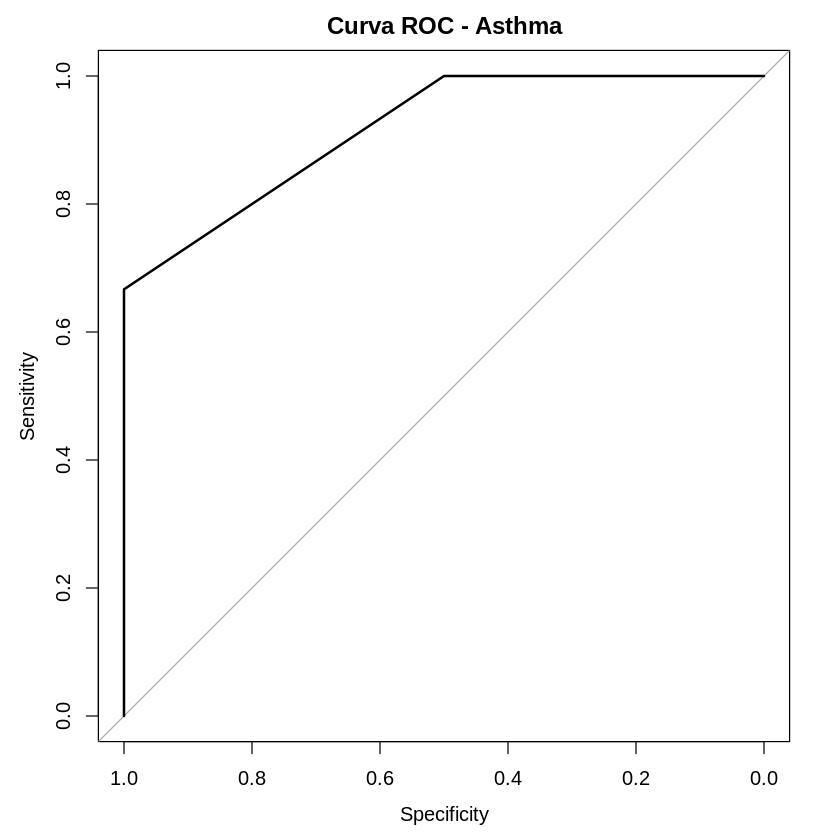

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_Asthma <- datos_Asthma$Top10

# Calcular la curva ROC
roc_Asthma<- roc(respuestas_verdaderas_Asthma, predicciones_Asthma)

# Plotear la curva ROC
plot(roc_Asthma, main = "Curva ROC - Asthma")
# Calcular el área bajo la curva (AUC)
auc_Asthma <- auc(respuestas_verdaderas_Asthma, predicciones_Asthma)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_Asthma, "\n")

3. HPO: Asthma HP:0002099 + Abnormality of the respiratory system HP:0002086

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 10 primeras o no
datos_Asthma_ARS$Top10 <- ifelse(datos_Asthma_ARS$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "Asthma_ARS"
modelo_Asthma_ARS <- glm(Top10 ~ Phenotypic_Score, data = datos_Asthma_ARS, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 10 primeras para la estrategia "Asthma_ARS"
nuevos_datos_Asthma_ARS <- data.frame(Phenotypic_Score = c(0.25, 0.5, 0.95))
probabilidades_Asthma_ARS <- predict(modelo_Asthma_ARS, newdata = nuevos_datos_Asthma_ARS, type = "response")

# Imprimir las probabilidades predichas para la estrategia "Asthma_ARS"
cat("Probabilidades para la estrategia 'Asthma_ARS':\n")
print(probabilidades_Asthma_ARS)


Probabilidades para la estrategia 'Asthma_ARS':
          1           2           3 
3.42074e-05 5.00000e-01 1.00000e+00 


In [ ]:
# Obtener las predicciones del modelo para los datos originales
predicciones_Asthma_ARS <- predict(modelo_Asthma_ARS, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.6)
predicciones_binarias_Asthma_ARS <- ifelse(predicciones_Asthma_ARS > 0.6, 1, 0)

# Crear una matriz de confusión
matriz_confusion_Asthma_ARS <- table(datos_Asthma_ARS$Top10, predicciones_binarias_Asthma_ARS)
print(matriz_confusion_Asthma_ARS)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_Asthma_ARS)) / sum(matriz_confusion_Asthma_ARS)
precision <- matriz_confusion_Asthma_ARS[2, 2] / sum(predicciones_binarias_Asthma_ARS)
recall <- matriz_confusion_Asthma_ARS[2, 2] / sum(datos_Asthma_ARS$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")


   predicciones_binarias_Asthma_ARS
    0 1
  0 2 0
  1 1 2
Accuracy: 0.8 
Precision: 1 
Recall: 0.6666667 
F1 Score: 0.8 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.9166667 


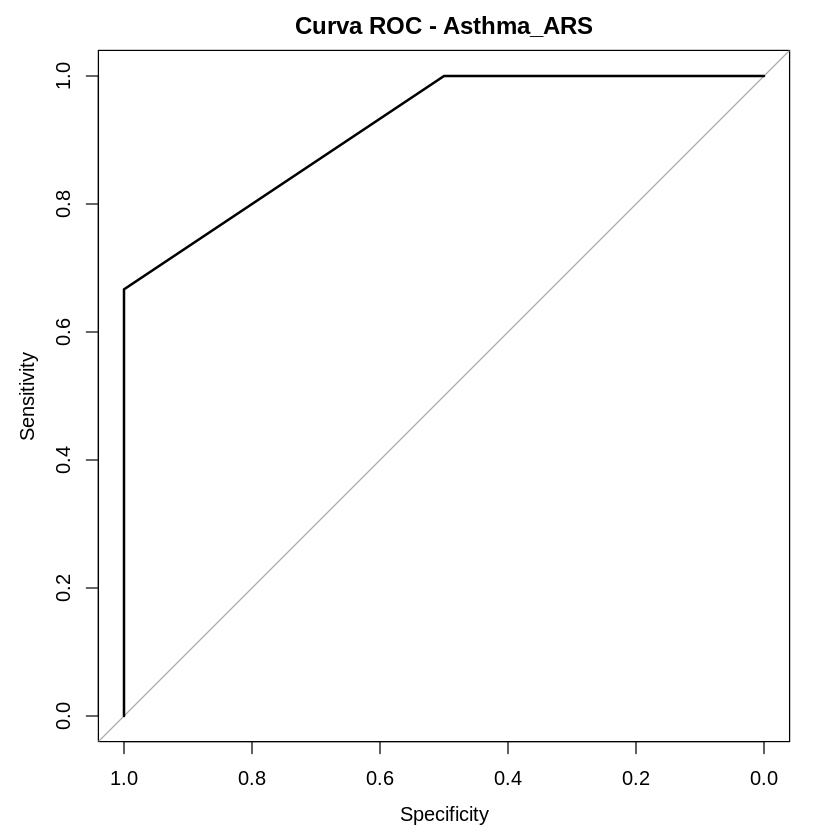

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_Asthma_ARS <- datos_Asthma_ARS$Top10

# Calcular la curva ROC
roc_Asthma_ARS <- roc(respuestas_verdaderas_Asthma_ARS, predicciones_Asthma_ARS)

# Plotear la curva ROC
plot(roc_Asthma_ARS, main = "Curva ROC - Asthma_ARS")

# Calcular el área bajo la curva (AUC)
auc_Asthma_ARS <- auc(respuestas_verdaderas_Asthma_ARS, predicciones_Asthma_ARS)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_Asthma_ARS, "\n")


4. HPO: Abnormality of the respiratory system HP:0002086

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 10 primeras o no
datos_Ab_Resp_system$Top10 <- ifelse(datos_Ab_Resp_system$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "Ab_Resp_system"
modelo_Ab_Resp_system <- glm(Top10 ~ Phenotypic_Score, data = datos_Ab_Resp_system, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 10 primeras para la estrategia "Ab_Resp_system"
nuevos_datos_Ab_Resp_system <- data.frame(Phenotypic_Score = c(0.25, 0.5, 0.95))
probabilidades_Ab_Resp_system <- predict(modelo_Ab_Resp_system, newdata = nuevos_datos_Ab_Resp_system, type = "response")

# Imprimir las probabilidades predichas para la estrategia "Ab_Resp_system"
cat("Probabilidades para la estrategia 'Ab_Resp_system':\n")
print(probabilidades_Ab_Resp_system)


Probabilidades para la estrategia 'Ab_Resp_system':
          1           2           3 
3.42074e-05 5.00000e-01 1.00000e+00 


   predicciones_binarias_Ab_Resp_system
    0 1
  0 2 0
  1 1 2
Accuracy: 0.8 
Precision: 1 
Recall: 0.6666667 
F1 Score: 0.8 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.9166667 


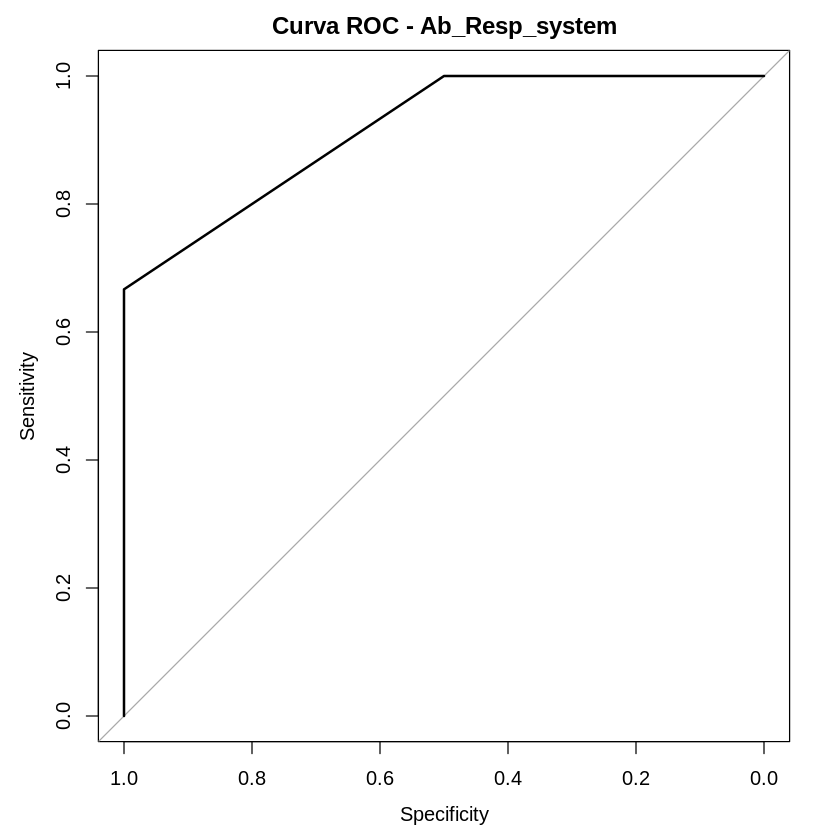

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las predicciones del modelo para los datos originales
predicciones_Ab_Resp_system <- predict(modelo_Ab_Resp_system, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.5)
predicciones_binarias_Ab_Resp_system <- ifelse(predicciones_Ab_Resp_system > 0.5, 1, 0)

# Crear una matriz de confusión
matriz_confusion_Ab_Resp_system <- table(datos_Ab_Resp_system$Top10, predicciones_binarias_Ab_Resp_system)
print(matriz_confusion_Ab_Resp_system)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_Ab_Resp_system)) / sum(matriz_confusion_Ab_Resp_system)
precision <- matriz_confusion_Ab_Resp_system[2, 2] / sum(predicciones_binarias_Ab_Resp_system)
recall <- matriz_confusion_Ab_Resp_system[2, 2] / sum(datos_Ab_Resp_system$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_Ab_Resp_system <- datos_Ab_Resp_system$Top10

# Calcular la curva ROC
roc_Ab_Resp_system <- roc(respuestas_verdaderas_Ab_Resp_system, predicciones_Ab_Resp_system)

# Plotear la curva ROC
plot(roc_Ab_Resp_system, main = "Curva ROC - Ab_Resp_system")
# Calcular el área bajo la curva (AUC)
auc_Ab_Resp_system <- auc(respuestas_verdaderas_Ab_Resp_system, predicciones_Ab_Resp_system)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_Ab_Resp_system, "\n")


5. HPO: Abnormality of the endocrine system HP:0000818

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 10 primeras o no
datos_Ab_endocrine_system$Top10 <- ifelse(datos_Ab_endocrine_system$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "Ab_endocrine_system"
modelo_Ab_endocrine_system <- glm(Top10 ~ Phenotypic_Score, data = datos_Ab_endocrine_system, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 10 primeras para la estrategia "Ab_endocrine_system"
nuevos_datos_Ab_endocrine_system <- data.frame(Phenotypic_Score = c(0.25, 0.5, 0.95))
probabilidades_Ab_endocrine_system <- predict(modelo_Ab_endocrine_system, newdata = nuevos_datos_Ab_endocrine_system, type = "response")

# Imprimir las probabilidades predichas para la estrategia "Ab_endocrine_system"
cat("Probabilidades para la estrategia 'Ab_endocrine_system':\n")
print(probabilidades_Ab_endocrine_system)


Probabilidades para la estrategia 'Ab_endocrine_system':
           1            2            3 
0.0001610349 0.7500000000 0.9999999931 


   predicciones_binarias_Ab_endocrine_system
    0 1
  0 1 1
  1 0 3
Accuracy: 0.8 
Precision: 0.75 
Recall: 1 
F1 Score: 0.8571429 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.75 


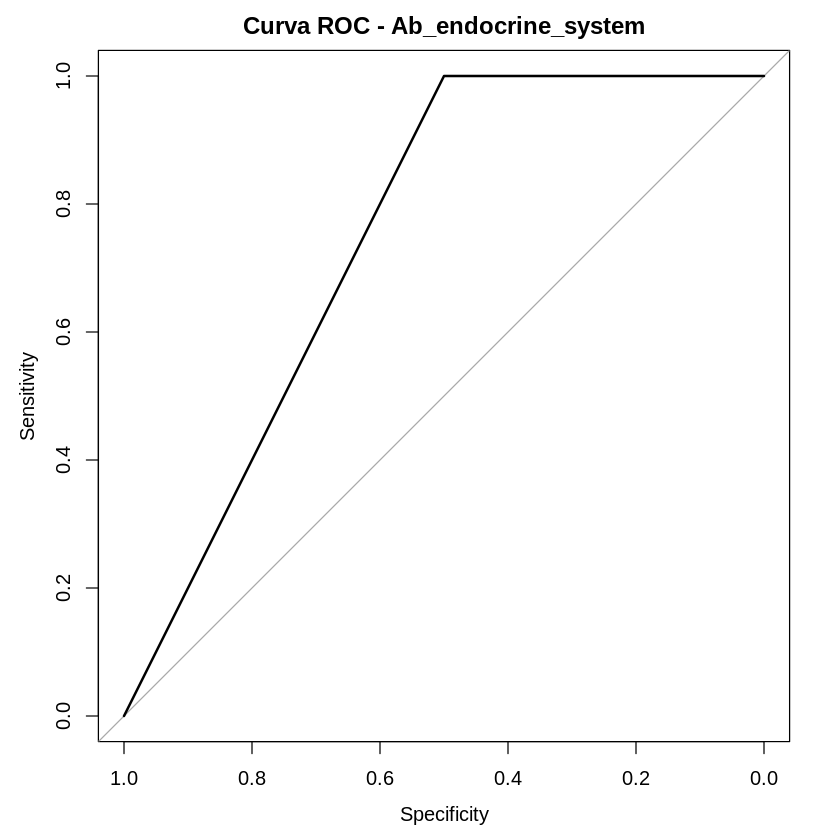

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las predicciones del modelo para los datos originales
predicciones_Ab_endocrine_system <- predict(modelo_Ab_endocrine_system, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.5)
predicciones_binarias_Ab_endocrine_system <- ifelse(predicciones_Ab_endocrine_system > 0.5, 1, 0)

# Crear una matriz de confusión
matriz_confusion_Ab_endocrine_system <- table(datos_Ab_endocrine_system$Top10, predicciones_binarias_Ab_endocrine_system)
print(matriz_confusion_Ab_endocrine_system)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_Ab_endocrine_system)) / sum(matriz_confusion_Ab_endocrine_system)
precision <- matriz_confusion_Ab_endocrine_system[2, 2] / sum(predicciones_binarias_Ab_endocrine_system)
recall <- matriz_confusion_Ab_endocrine_system[2, 2] / sum(datos_Ab_endocrine_system$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_Ab_endocrine_system <- datos_Ab_endocrine_system$Top10

# Calcular la curva ROC
roc_Ab_endocrine_system <- roc(respuestas_verdaderas_Ab_endocrine_system, predicciones_Ab_endocrine_system)

# Plotear la curva ROC
plot(roc_Ab_endocrine_system, main = "Curva ROC - Ab_endocrine_system")
# Calcular el área bajo la curva (AUC)
auc_Ab_endocrine_system <- auc(respuestas_verdaderas_Ab_endocrine_system, predicciones_Ab_endocrine_system)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_Ab_endocrine_system, "\n")

6. Todos los HPO juntos

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 10 primeras o no
datos_all_HPOS$Top10 <- ifelse(datos_all_HPOS$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "all_HPOS"
modelo_all_HPOS <- glm(Top10 ~ Phenotypic_Score, data = datos_all_HPOS, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 10 primeras para la estrategia "all_HPOS"
nuevos_datos_all_HPOS <- data.frame(Phenotypic_Score = c(0.25, 0.5, 0.95))
probabilidades_all_HPOS <- predict(modelo_all_HPOS, newdata = nuevos_datos_all_HPOS, type = "response")

# Imprimir las probabilidades predichas para la estrategia "all_HPOS"
cat("Probabilidades para la estrategia 'all_HPOS':\n")
print(probabilidades_all_HPOS)


Warning message:
“glm.fit: fitted probabilities numerically 0 or 1 occurred”


Probabilidades para la estrategia 'all_HPOS':
           1            2            3 
6.412984e-13 5.000000e-01 1.000000e+00 


   predicciones_binarias_all_HPOS
    0 1
  0 1 1
  1 0 3
Accuracy: 0.8 
Precision: 0.75 
Recall: 1 
F1 Score: 0.8571429 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.9166667 


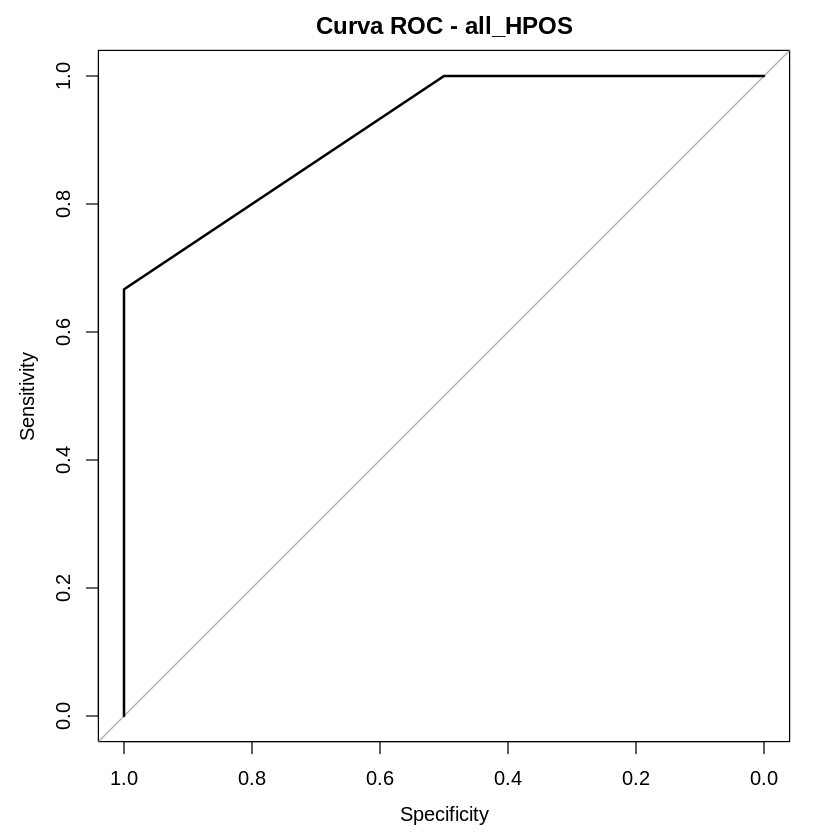

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las predicciones del modelo para los datos originales
predicciones_all_HPOS <- predict(modelo_all_HPOS, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.5)
predicciones_binarias_all_HPOS <- ifelse(predicciones_all_HPOS > 0.5, 1, 0)

# Crear una matriz de confusión
matriz_confusion_all_HPOS <- table(datos_all_HPOS$Top10, predicciones_binarias_all_HPOS)
print(matriz_confusion_all_HPOS)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_all_HPOS)) / sum(matriz_confusion_all_HPOS)
precision <- matriz_confusion_all_HPOS[2, 2] / sum(predicciones_binarias_all_HPOS)
recall <- matriz_confusion_all_HPOS[2, 2] / sum(datos_all_HPOS$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_all_HPOS <- datos_all_HPOS$Top10

# Calcular la curva ROC
roc_all_HPOS <- roc(respuestas_verdaderas_all_HPOS, predicciones_all_HPOS)

# Plotear la curva ROC
plot(roc_all_HPOS, main = "Curva ROC - all_HPOS")

# Calcular el área bajo la curva (AUC)
auc_all_HPOS <- auc(respuestas_verdaderas_all_HPOS, predicciones_all_HPOS)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_all_HPOS, "\n")


7. HPO: Decreased circulating T4 concentration HP:0031507

In [ ]:
# Crear la variable binaria que indica si una variante está entre las 10 primeras o no
datos_Decreased_T4$Top10 <- ifelse(datos_Decreased_T4$Ranking <= 10, 1, 0)

# Ajustar el modelo de regresión logística para la estrategia "Decreased_T4"
modelo_Decreased_T4 <- glm(Top10 ~ Phenotypic_Score, data = datos_Decreased_T4, family = "binomial")

# Calcular las probabilidades predichas de que una variante esté entre las 10 primeras para la estrategia "Decreased_T4"
nuevos_datos_Decreased_T4 <- data.frame(Phenotypic_Score = c(0.25, 0.5, 0.95))
probabilidades_Decreased_T4 <- predict(modelo_Decreased_T4, newdata = nuevos_datos_Decreased_T4, type = "response")

# Imprimir las probabilidades predichas para la estrategia "Decreased_T4"
cat("Probabilidades para la estrategia 'Decreased_T4':\n")
print(probabilidades_Decreased_T4)


Probabilidades para la estrategia 'Decreased_T4':
           1            2            3 
0.0001610349 0.7500000000 0.9999999931 


   predicciones_binarias_Decreased_T4
    0 1
  0 1 1
  1 0 3
Accuracy: 0.8 
Precision: 0.75 
Recall: 1 
F1 Score: 0.8571429 


Setting levels: control = 0, case = 1

Setting direction: controls < cases

Setting levels: control = 0, case = 1

Setting direction: controls < cases



Área bajo la curva (AUC): 0.75 


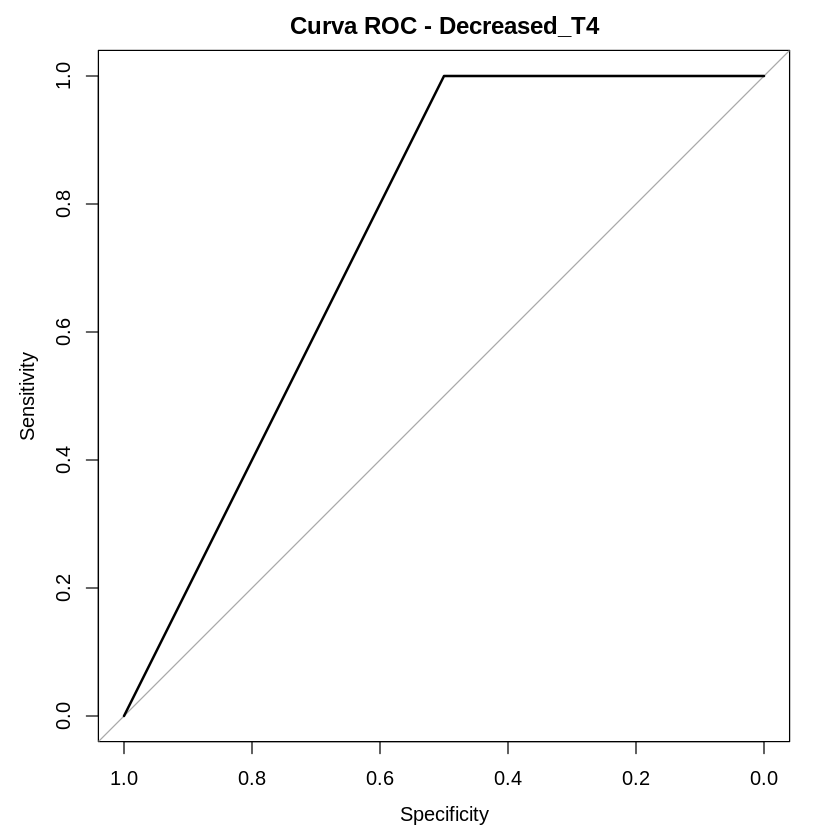

In [ ]:
# Verificar si la librería pROC está instalada
if (!requireNamespace("pROC", quietly = TRUE)) {
  # Instalar la librería pROC
  install.packages("pROC")
}

# Cargar la librería pROC
library(pROC)

# Obtener las predicciones del modelo para los datos originales
predicciones_Decreased_T4 <- predict(modelo_Decreased_T4, type = "response")

# Crear una variable binaria de predicciones (considerando un punto de corte de 0.5)
predicciones_binarias_Decreased_T4 <- ifelse(predicciones_Decreased_T4 > 0.5, 1, 0)

# Crear una matriz de confusión
matriz_confusion_Decreased_T4 <- table(datos_Decreased_T4$Top10, predicciones_binarias_Decreased_T4)
print(matriz_confusion_Decreased_T4)

# Calcular las métricas de desempeño del modelo
accuracy <- sum(diag(matriz_confusion_Decreased_T4)) / sum(matriz_confusion_Decreased_T4)
precision <- matriz_confusion_Decreased_T4[2, 2] / sum(predicciones_binarias_Decreased_T4)
recall <- matriz_confusion_Decreased_T4[2, 2] / sum(datos_Decreased_T4$Top10)
f1_score <- 2 * (precision * recall) / (precision + recall)

cat("Accuracy:", accuracy, "\n")
cat("Precision:", precision, "\n")
cat("Recall:", recall, "\n")
cat("F1 Score:", f1_score, "\n")

# Obtener las respuestas verdaderas para los datos originales
respuestas_verdaderas_Decreased_T4 <- datos_Decreased_T4$Top10

# Calcular la curva ROC
roc_Decreased_T4 <- roc(respuestas_verdaderas_Decreased_T4, predicciones_Decreased_T4)

# Plotear la curva ROC
plot(roc_Decreased_T4, main = "Curva ROC - Decreased_T4")

# Calcular el área bajo la curva (AUC)
auc_Decreased_T4 <- auc(respuestas_verdaderas_Decreased_T4, predicciones_Decreased_T4)

# Mostrar el AUC
cat("Área bajo la curva (AUC):", auc_Decreased_T4, "\n")


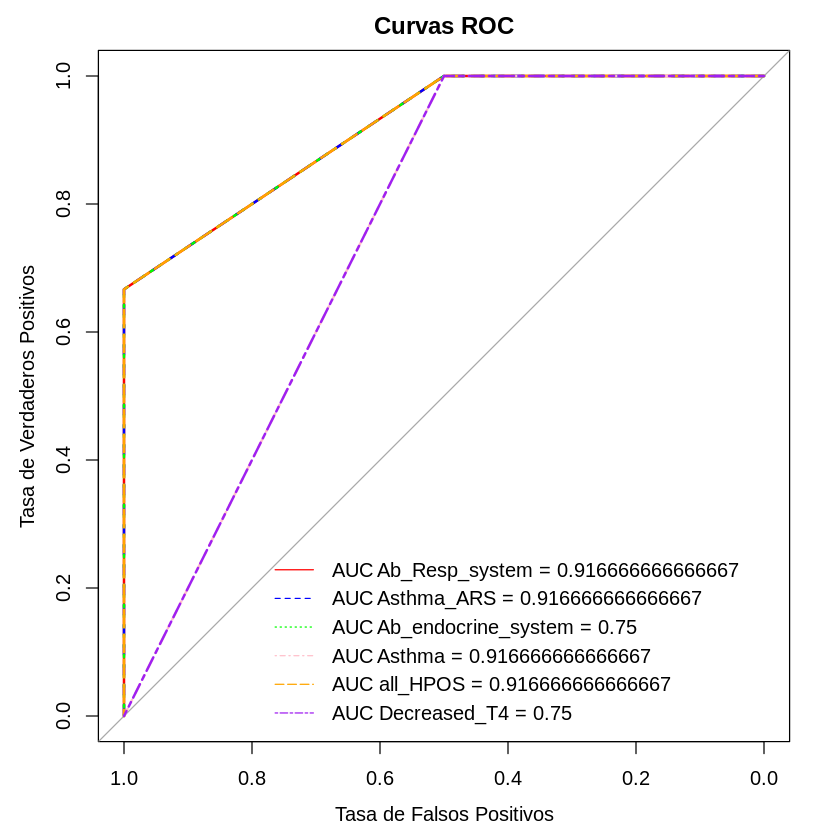

In [ ]:
# Tramar la primera curva ROC
plot(roc_Ab_Resp_system, col = "red", lty = 1, main = "Curvas ROC", xlab = "Tasa de Falsos Positivos", ylab = "Tasa de Verdaderos Positivos")

# Agregar las otras curvas ROC
lines(roc_Asthma_ARS, col = "blue", lty = 2)
lines(roc_Asthma, col = "green", lty = 3)
lines(roc_Ab_endocrine_system, col = "pink", lty = 4)
lines(roc_all_HPOS, col = "orange", lty = 5)
lines(roc_Decreased_T4, col = "purple", lty = 6)

# Mostrar los AUC en una leyenda
legend("bottomright", legend = c(
  paste("AUC Ab_Resp_system =", auc_Ab_Resp_system),
  paste("AUC Asthma_ARS =", auc_Asthma_ARS),
  paste("AUC Ab_endocrine_system =", auc_Ab_endocrine_system),
  paste("AUC Asthma =", auc_Asthma),
  paste("AUC all_HPOS =", auc_all_HPOS),
  paste("AUC Decreased_T4 =", auc_Decreased_T4)
),
col = c("red", "blue", "green", "pink", "orange", "purple"),
lty = c(1, 2, 3, 4, 5, 6),
bty = "n"
)


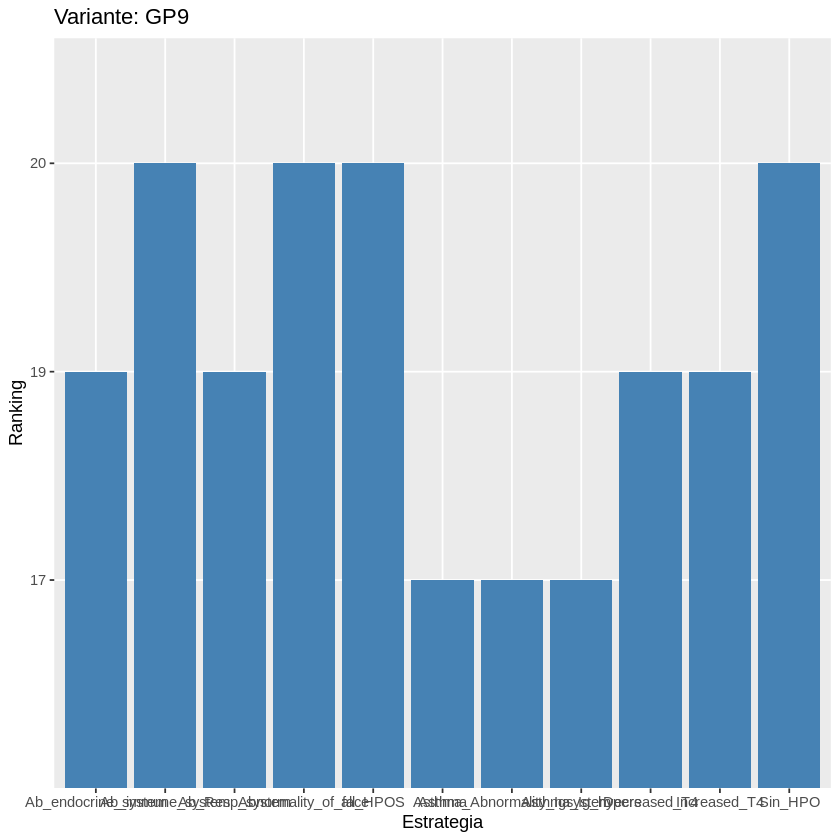

In [ ]:
library(ggplot2)

# Gráfico de barras del ranking para una variante específica
variante <- "GP9"  # Variante específica que deseas analizar
subset_tabla <- subset(tabla_resultados, Variante == variante)

# Crear el gráfico de barras
ggplot(subset_tabla, aes(x = Estrategia, y = Ranking)) +
  geom_bar(stat = "identity", fill = "steelblue") +
  labs(title = paste("Variante:", variante), x = "Estrategia", y = "Ranking")


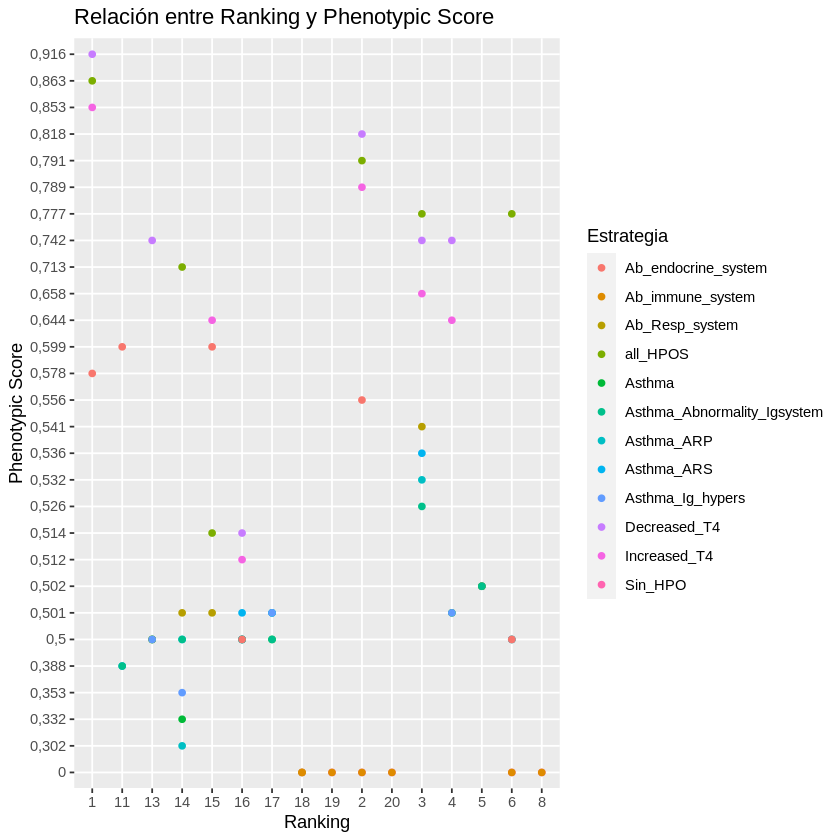

In [ ]:
library(ggplot2)

# Gráfico de dispersión del ranking y puntaje fenotípico para todas las variantes
ggplot(tabla_resultados, aes(x = Ranking, y = Phenotypic_Score, color = Estrategia)) +
  geom_point() +
  labs(title = "Relación entre Ranking y Phenotypic Score", x = "Ranking", y = "Phenotypic Score")


In [ ]:
# ANOVA de dos factores para el ranking
anova_ranking <- aov(Ranking ~ Variante + Estrategia, data = tabla_resultados)
summary(anova_ranking)


ERROR: ignored

En este caso, se observa lo siguiente:

Variante: El valor de p es menor que 0.001 (***), lo que indica que hay diferencias significativas en el ranking entre las variantes. Esto significa que las variantes tienen un impacto significativo en el ranking.

Estrategia: El valor de p es 0.835 (> 0.05), lo que indica que no hay diferencias significativas en el ranking entre las estrategias. Esto significa que las estrategias utilizadas no tienen un impacto significativo en el ranking.

Residuals: Representa la variabilidad no explicada por los factores. En este caso, se obtiene una suma de cuadrados de 1220 y un promedio de cuadrados de 12.3.

En resumen, el análisis indica que las variantes tienen un efecto significativo en el ranking, mientras que las estrategias utilizadas no muestran diferencias significativas en el ranking.

In [ ]:
# Lectura del archivo CSV
data_asthma <- read.csv("/content/-genesT4.csv")

# Obtener los niveles únicos de la columna de estrategia
estrategias <- unique(data_asthma$Estrategia)

# Realizar pruebas de Wilcoxon-Mann-Whitney para cada par de estrategias
results <- list()
for (i in 1:(length(estrategias)-1)) {
  for (j in (i+1):length(estrategias)) {
    estrategia1 <- estrategias[i]
    estrategia2 <- estrategias[j]
    subset_data <- data_asthma[data_asthma$Estrategia %in% c(estrategia1, estrategia2), ]
    result <- wilcox.test(subset_data$Ranking ~ subset_data$Estrategia,
                          alternative = "two.sided",
                          paired = FALSE,
                          exact = FALSE)
    test_name <- paste(estrategia1, "-", estrategia2)
    results[[test_name]] <- result
  }
}

# Imprimir los resultados
for (test_name in names(results)) {
  cat(test_name, ":\n")
  print(results[[test_name]])
  cat("\n")
}


Asthma - Asthma_ARS :

	Wilcoxon rank sum test with continuity correction

data:  subset_data$Ranking by subset_data$Estrategia
W = 19.5, p-value = 0.8721
alternative hypothesis: true location shift is not equal to 0


Asthma - Asthma_ARP :

	Wilcoxon rank sum test with continuity correction

data:  subset_data$Ranking by subset_data$Estrategia
W = 19, p-value = 0.9357
alternative hypothesis: true location shift is not equal to 0


Asthma - Ab_Resp_system :

	Wilcoxon rank sum test with continuity correction

data:  subset_data$Ranking by subset_data$Estrategia
W = 17, p-value = 0.936
alternative hypothesis: true location shift is not equal to 0


Asthma - Asthma_Ig_hypers :

	Wilcoxon rank sum test with continuity correction

data:  subset_data$Ranking by subset_data$Estrategia
W = 18, p-value = 1
alternative hypothesis: true location shift is not equal to 0


Asthma - Asthma_Abnormality_Igsystem :

	Wilcoxon rank sum test with continuity correction

data:  subset_data$Ranking by subs

In [ ]:
# Lectura del archivo CSV
data_asthma <- read.csv("/content/-genesT4.csv")
data_asthma$Phenotypic_Score <- as.numeric(data_asthma$Phenotypic_Score)

# Obtener los niveles únicos de la columna de estrategia
estrategias <- unique(data_asthma$Estrategia)

# Realizar pruebas de Wilcoxon-Mann-Whitney para cada par de estrategias en los Phenotypic Scores
results <- list()
for (i in 1:(length(estrategias)-1)) {
  for (j in (i+1):length(estrategias)) {
    estrategia1 <- estrategias[i]
    estrategia2 <- estrategias[j]
    subset_data <- data_asthma[data_asthma$Estrategia %in% c(estrategia1, estrategia2), ]
    result <- wilcox.test(subset_data$Phenotypic_Score ~ subset_data$Estrategia,
                          alternative = "two.sided",
                          paired = FALSE,
                          exact = FALSE)
    test_name <- paste(estrategia1, "-", estrategia2)
    results[[test_name]] <- result
  }
}

# Imprimir los resultados
for (test_name in names(results)) {
  cat(test_name, ":\n")
  print(results[[test_name]])
  cat("\n")
}


Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


ERROR: ignored